<a href="https://colab.research.google.com/github/Storm00212/Introduction-to-machine-learning-models/blob/main/Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌲 Random Forests & 🌄 Gradient Boosted Trees

In this lesson, we explore two powerful **ensemble learning algorithms** — Random Forests and Gradient Boosted Trees.

Ensemble methods combine multiple models to improve performance and generalization. The key idea is that **a group of diverse, weak learners can form a strong model** when combined properly.

## 1️⃣ Ensemble Learning Overview

There are two main ensemble approaches:

### 🪵 **Bagging (Bootstrap Aggregation)**
- Trains multiple models on **different random subsets** of the training data (sampled *with replacement*).
- Each model votes or averages predictions.
- Helps reduce **variance** and prevent overfitting.

➡️ Used by **Random Forests**.

### 🚀 **Boosting**
- Trains models **sequentially**.
- Each new model focuses on correcting the errors made by the previous ones.
- Helps reduce **bias** and improve accuracy.

➡️ Used by **Gradient Boosted Trees**.

## 2️⃣ Creating a Simple Dataset

We'll use the **`make_moons`** dataset — a simple 2D dataset that helps visualize decision boundaries.

We’ll later compare how Decision Trees, Random Forests, and Gradient Boosted Trees handle this same dataset.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (80, 2)
Testing set shape: (20, 2)


## 3️⃣ Baseline Model — Decision Tree

Before we use ensemble methods, let’s train a **single Decision Tree** as a baseline to compare performance.

We'll evaluate both training and test accuracy to check for **overfitting**.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.80


### 🧭 Visualizing the Decision Boundary

Let’s visualize how the single Decision Tree splits the dataset.
We’ll use a helper function to plot the model’s decision regions.

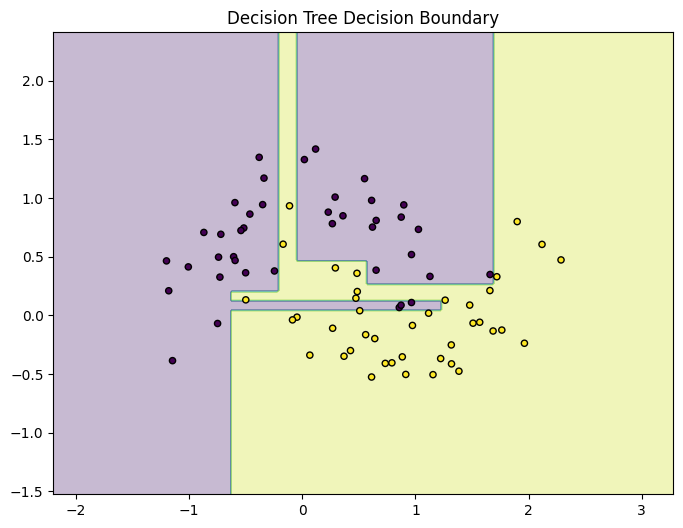

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    return ax

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(dt, X_train, y_train, ax)
ax.set_title('Decision Tree Decision Boundary')
plt.show()

## 4️⃣ Random Forests

A **Random Forest** is a collection of Decision Trees trained on **different random subsets** of the data and features.

Each tree votes, and the final prediction is based on the majority vote (for classification) or the average (for regression).

**Advantages:**
- Reduces overfitting (averaging reduces variance)
- Handles large feature sets well
- Provides feature importance scores

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")

Training Accuracy: 0.99
Test Accuracy: 0.90


### 🌲 Visualizing Individual Trees and the Forest Boundary

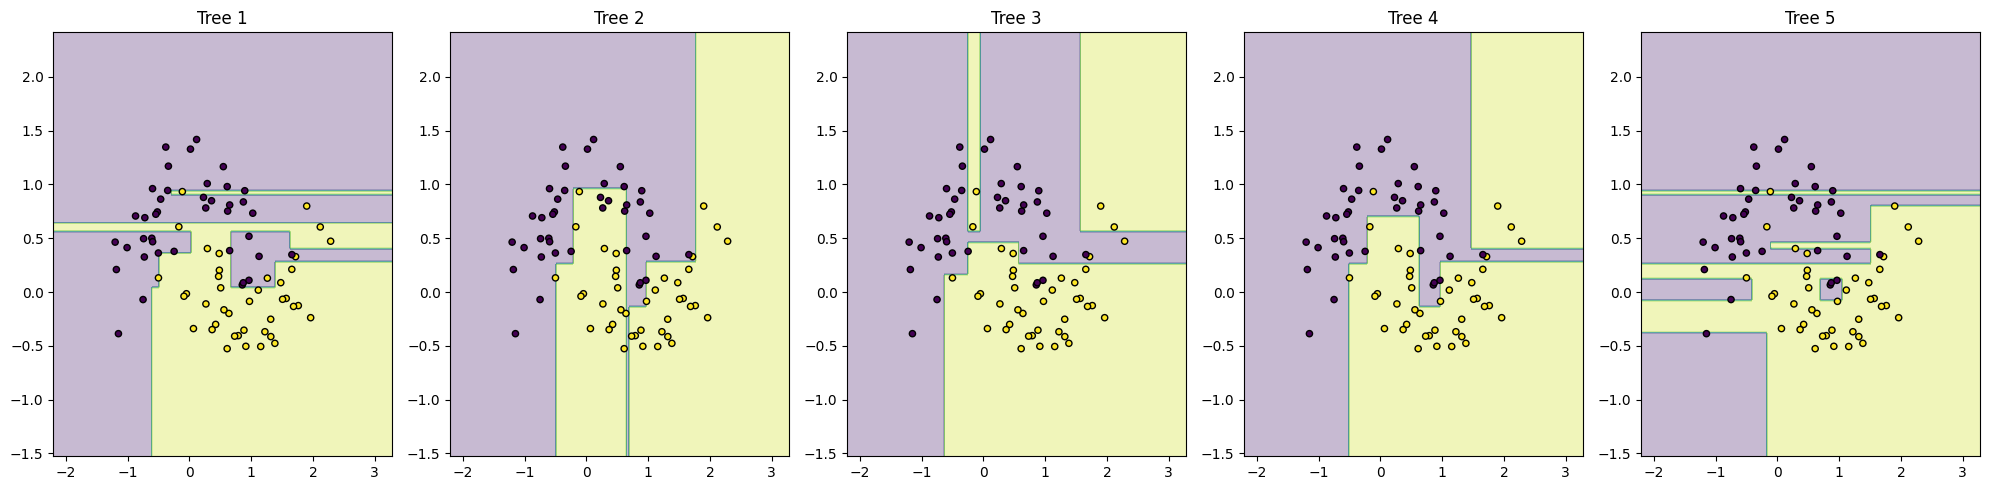

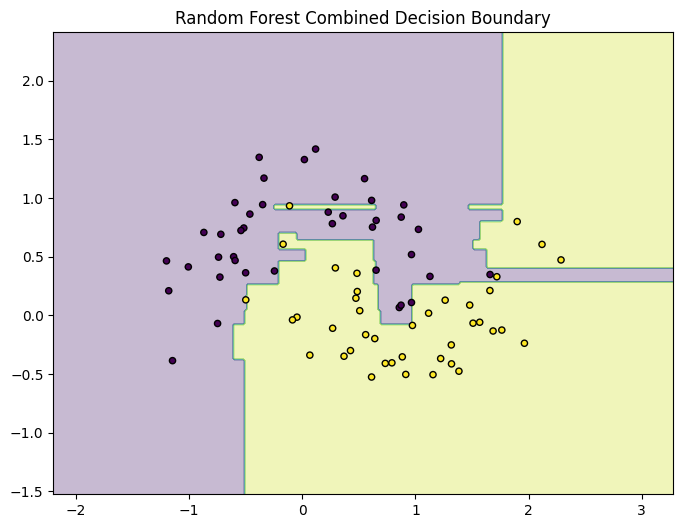

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=len(rf.estimators_), figsize=(20, 5))
for i, tree in enumerate(rf.estimators_):
    plot_decision_boundary(tree, X_train, y_train, axes[i])
    axes[i].set_title(f'Tree {i+1}')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(rf, X_train, y_train, ax)
ax.set_title('Random Forest Combined Decision Boundary')
plt.show()

## 5️⃣ Gradient Boosted Trees

Now, let’s look at **Gradient Boosted Trees**, which use a different approach called **boosting**.

- Trees are built **sequentially**, where each new tree tries to fix the errors made by the previous ones.
- The model improves gradually, learning from its mistakes.

**Advantages:**
- Often more accurate than Random Forests
- Works well with structured/tabular data

**Disadvantages:**
- More sensitive to hyperparameters
- Can overfit if not tuned carefully

Training Accuracy: 0.85
Test Accuracy: 0.90


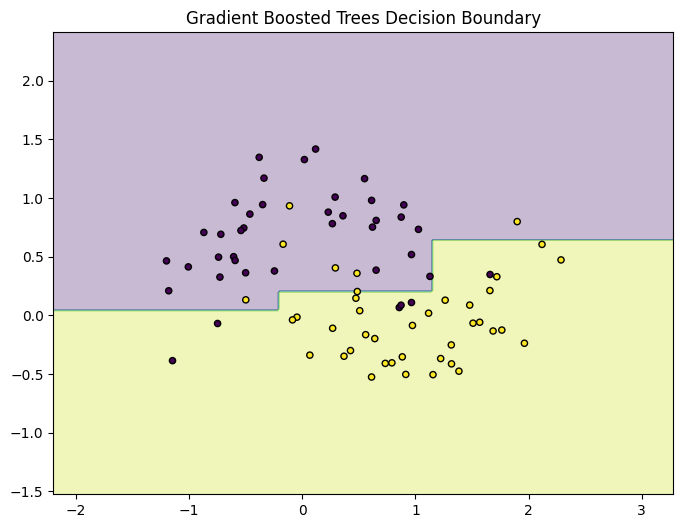

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=5, learning_rate=0.5, max_depth=1, random_state=42)
gbc.fit(X_train, y_train)

y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(gbc, X_train, y_train, ax)
ax.set_title('Gradient Boosted Trees Decision Boundary')
plt.show()

## 6️⃣ Model Comparison

Let’s quickly compare performance across all three models.

| Model | Concept | Training Accuracy | Test Accuracy |
|:--|:--|:--:|:--:|
| Decision Tree | Single tree, prone to overfitting | — | — |
| Random Forest | Bagging (parallel trees) | — | — |
| Gradient Boosting | Boosting (sequential trees) | — | — |

In [8]:
models = {'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting': gbc}

for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name:20s} | Train: {train_acc:.2f} | Test: {test_acc:.2f}")

Decision Tree        | Train: 1.00 | Test: 0.80
Random Forest        | Train: 0.99 | Test: 0.90
Gradient Boosting    | Train: 0.85 | Test: 0.90


## ✅ Summary

**Decision Tree:** Simple, easy to interpret, but can overfit.

**Random Forest:** Uses bagging to reduce overfitting and improve stability.

**Gradient Boosted Trees:** Uses boosting to iteratively correct mistakes and improve accuracy.

Both ensemble methods show how combining multiple weak learners can create a much stronger model. 🚀